In [91]:
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
from tensorflow.keras import layers
import keras.datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np

import tensorflow_datasets as tfds




In [92]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
emnist_mapping = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
                  10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
                  20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
                  30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd',
                  40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n',
                  50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x',
                  60: 'y', 61: 'z'}

In [96]:

# Paths to the downloaded CSV files
train_csv_path = "/content/drive/My Drive/emnist-balanced-train.csv"
test_csv_path = "/content/drive/My Drive/emnist-balanced-test.csv"


# Load CSV data
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

# Split features and labels
x_train = train_data.iloc[:, 1:].values.astype(np.float32) / 255.0  # Normalize to [0, 1]
y_train_unmap = train_data.iloc[:, 0].values

x_test = test_data.iloc[:, 1:].values.astype(np.float32) / 255.0  # Normalize to [0, 1]
y_test_unmap = test_data.iloc[:, 0].values

# Convert to TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train_unmap)).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test_unmap)).batch(32).prefetch(tf.data.AUTOTUNE)

print(f"Train dataset: {train_ds}")
print(f"Test dataset: {test_ds}")


Train dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
Test dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [97]:
y_train = [emnist_mapping[label] for label in y_train_unmap]
y_test = [emnist_mapping[label] for label in y_test_unmap]

print("Mapped Training Labels:", y_train[:10])  # Print first 10 mapped labels
print("Mapped Test Labels:", y_test[:10])

Mapped Training Labels: ['a', 'h', 'F', '4', 'g', 'Q', 'W', 'K', '1', 'k']
Mapped Test Labels: ['d', '9', 'Q', 'i', 'X', 'E', 'B', '3', 'C', 'G']


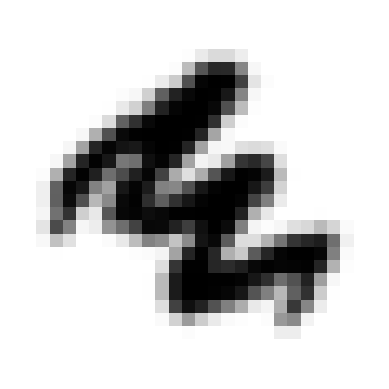

In [101]:
some_digit=x_train[9979]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [102]:
y_train[9979]

'M'

In [103]:
print("Size of the dataset:", len(x_train) + len(x_test))
print("Number of elements in the training set:", len(x_train))
print("Number of elements in the test set:", len(x_test))

Size of the dataset: 131598
Number of elements in the training set: 112799
Number of elements in the test set: 18799


Test accuracy: 0.9688


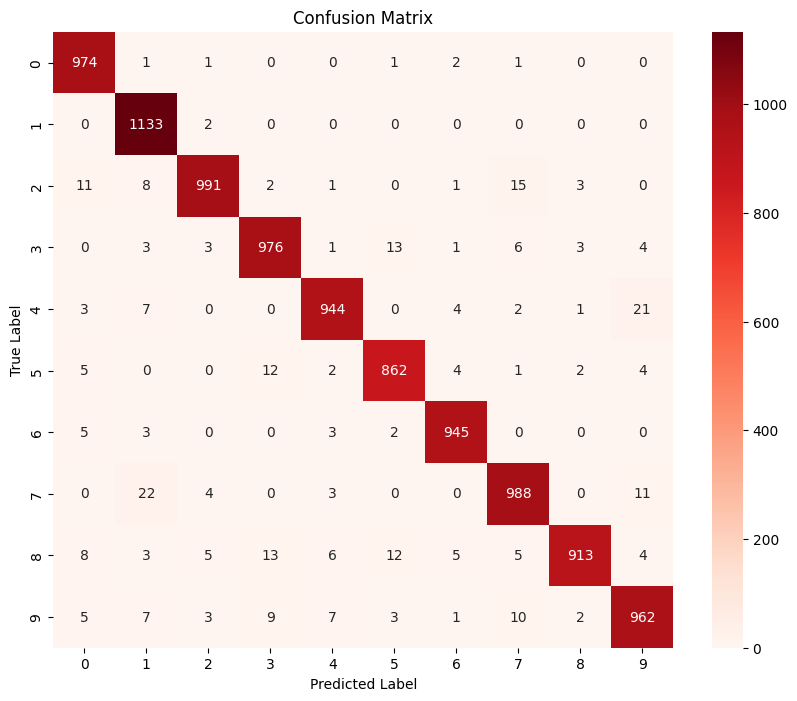

In [104]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = knn.score(x_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Test accuracy: 0.9160


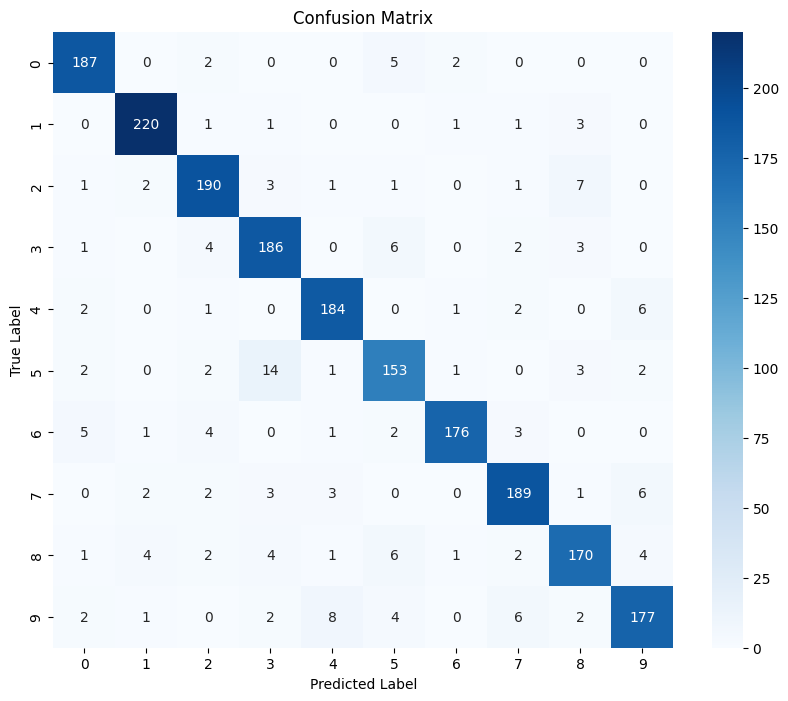

Size of the dataset: 12000
Number of elements in the training set: 10000
Number of elements in the test set: 2000


In [108]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

x_train, _, y_train, _ = train_test_split(x_train, y_train, train_size=10000, random_state=42, stratify=y_train)
x_test, _, y_test, _ = train_test_split(x_test, y_test, train_size=2000, random_state=42, stratify=y_test)

svm = SVC(kernel='linear', C=1.3, random_state=42)
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Size of the dataset:", len(x_train) + len(x_test))
print("Number of elements in the training set:", len(x_train))
print("Number of elements in the test set:", len(x_test))

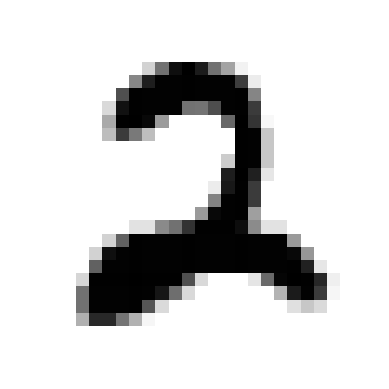

In [86]:
some_digit=x_test[1465]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [84]:
y_pred[1465]

2

In [85]:
y_test[1465]

2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Test Accuracy: 0.9202


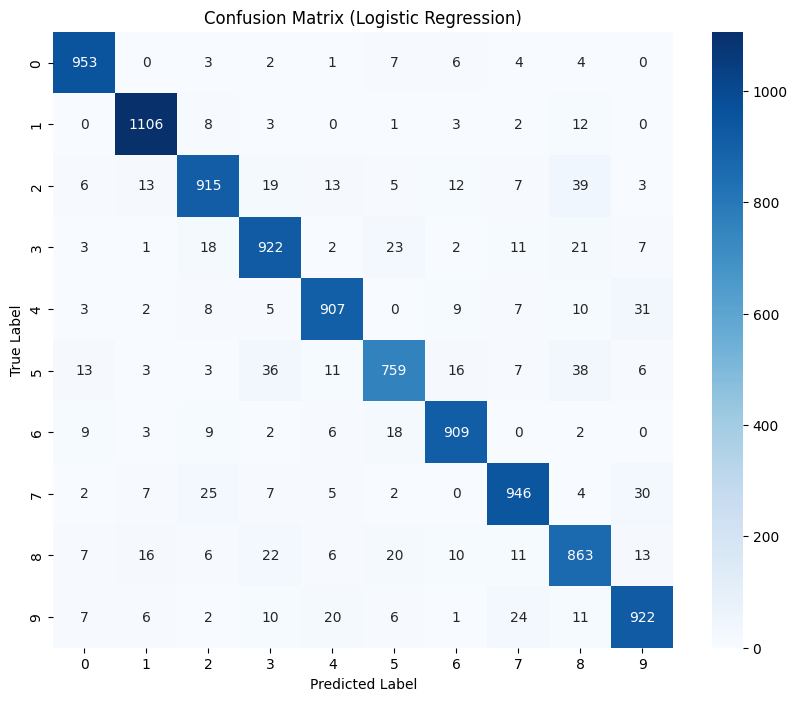

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

logreg = LogisticRegression(max_iter=1400)
logreg.fit(x_train_flat, y_train)

y_pred_logreg = logreg.predict(x_test_flat)

accuracy = logreg.score(x_test_flat, y_test)
print(f"Logistic Regression Test Accuracy: {accuracy:.4f}")

cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

Test accuracy: 0.8755


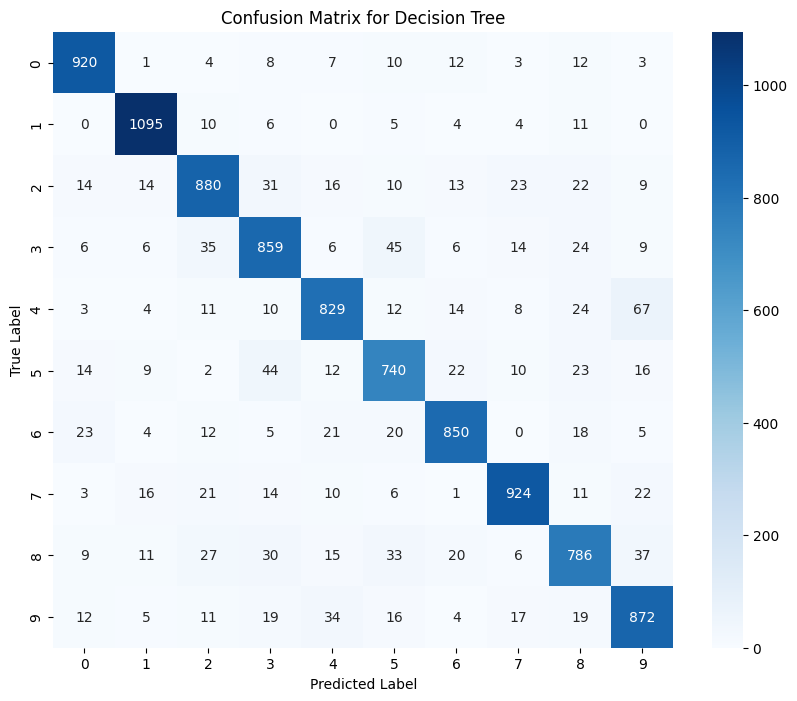

In [106]:
from sklearn.tree import DecisionTreeClassifier

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

dt_classifier = DecisionTreeClassifier(max_depth=11)

dt_classifier.fit(x_train, y_train)

y_pred = dt_classifier.predict(x_test)

accuracy = dt_classifier.score(x_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

Epoch 1/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 50s 115ms/step - accuracy: 0.7599 - loss: 0.7658 - val_accuracy: 0.9787 - val_loss: 0.0796
Epoch 2/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 79s 108ms/step - accuracy: 0.9643 - loss: 0.1175 - val_accuracy: 0.9850 - val_loss: 0.0557
Epoch 3/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 109ms/step - accuracy: 0.9741 - loss: 0.0866 - val_accuracy: 0.9882 - val_loss: 0.0467
Epoch 4/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 108ms/step - accuracy: 0.9773 - loss: 0.0727 - val_accuracy: 0.9888 - val_loss: 0.0432
Epoch 5/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 108ms/step - accuracy: 0.9799 - loss: 0.0623 - val_accuracy: 0.9902 - val_loss: 0.0373
Epoch 6/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 116ms/step - accuracy: 0.9813 - loss: 0.0574 - val_accuracy: 0.9898 - val_loss: 0.0361
Epoch 7/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 78s 107ms/step - accuracy: 0.9847 - loss: 0.0524 - val_accuracy: 0.9897 - val_loss: 0.0385
Epoch 8/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 108ms/step - accuracy: 0.9841 - loss: 0

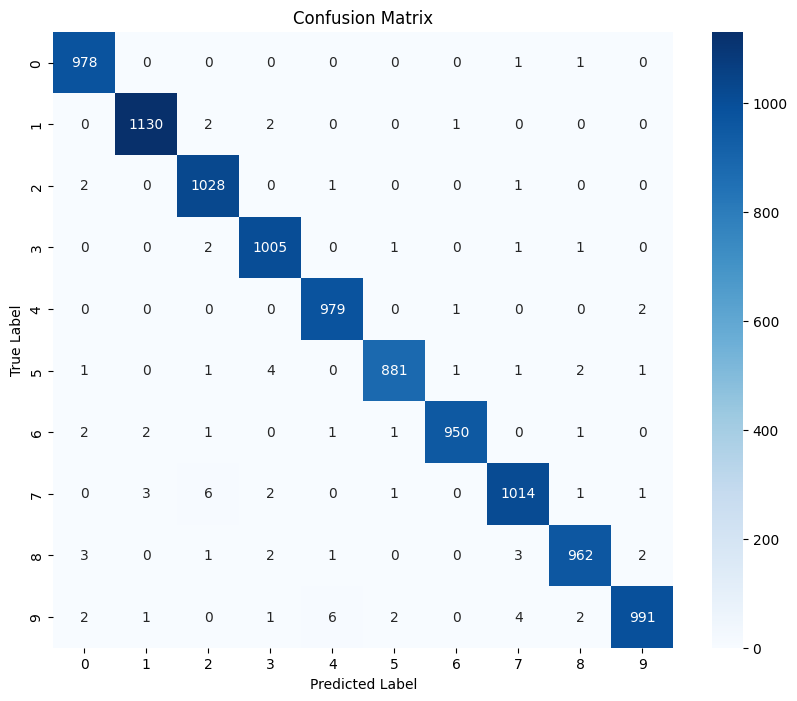

In [105]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# CNN Model( Artificial neural Network)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=128, epochs=12, validation_split=0.1)

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

y_pred = np.argmax(model.predict(x_test), axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()